In [1]:
from keras.datasets import imdb
from keras import models
from keras import layers
import matplotlib.pyplot as plt
import numpy as np
from keras import regularizers

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((25000,), (25000,), (25000,), (25000,))

### One-hot Encoding

In [4]:
def vectorize_sequences (sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] =1
    return results

In [5]:
# Vectorizing the training & testing data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
# Vectorizing the labels also
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [7]:
x_train.shape

(25000, 10000)

### Version of model with lower capacity

In [8]:
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

#### Regularization in Keras
- regularizers.l1(0.001)
- regularizers.l2(0.001)
- regularizers.l1_l2(l1=0.001, l2=0.001) #Simultaneous L1 & L2 Regularizations

## Adding Dorpout
Dropout is a regularization technique commonly used in neural networks to prevent overfitting. It involves randomly dropping out (setting to zero) a proportion of the neurons in a layer during training. This forces the network to learn more robust representations by preventing the neurons from relying too much on each other.

During the forward pass of training, dropout randomly sets a fraction of the input units to zero at each update. The fraction, often referred to as the dropout rate, is typically set between 0.2 and 0.5. This means that for each training example, a different subset of neurons will be "dropped out" or deactivated.

The main idea behind dropout is that by randomly dropping out neurons, the network becomes less sensitive to the precise weights of individual connections. This reduces the likelihood of overfitting because the network cannot rely too heavily on any particular feature or combination of features. Instead, it forces the network to learn more robust features that are useful in conjunction with different subsets of neurons.

During inference or testing, dropout is usually turned off, and the full network is used. However, the weights of the network are typically scaled by the dropout rate to ensure that the expected output of each neuron remains the same as during training.

Dropout has been shown to be an effective regularization technique in neural networks, helping to improve generalization and reduce overfitting. It is particularly useful when dealing with large, complex networks or datasets with limited training examples. By preventing co-adaptation of neurons, dropout encourages the network to learn more generalizable representations, leading to better performance on unseen data.

In [9]:
lo = [1, 2, 3, 4, 5]
lo_arr = np.array(lo)  # Convert list to NumPy array
lo_arr *= np.random.randint(0, high=3, size=lo_arr.shape)  # Perform element-wise multiplication
lo_arr

array([ 2,  4,  6,  8, 10])

### Verion of model with Dropout

In [10]:
model1 = models.Sequential()
model1.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), activation = 'relu', input_shape = (10000,)))
model1.add(layers.Dense(16, activation = 'relu'))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(1, activation = 'sigmoid'))

#### Common Ways of Reducing Overfitting of a NN Model
- Get more training data
- Reduce the capacity of the network
- Add weight regularization
- Add dropout

In [11]:
model1.compile(optimizer ='rmsprop', loss='binary_crossentropy', metrics = ['accuracy'])

In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train= y_train[10000:]

In [13]:
history = model1.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 52ms/step - loss: 0.6385 - accuracy: 0.6911 - val_loss: 0.5273 - val_accuracy: 0.8551
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.4777 - accuracy: 0.8299 - val_loss: 0.4075 - val_accuracy: 0.8763
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3872 - accuracy: 0.8749 - val_loss: 0.3524 - val_accuracy: 0.8849
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3320 - accuracy: 0.8967 - val_loss: 0.3254 - val_accuracy: 0.8878
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2922 - accuracy: 0.9108 - val_loss: 0.3189 - val_accuracy: 0.8875
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2688 - accuracy: 0.9218 - val_loss: 0.3463 - val_accuracy: 0.8724
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2453 - accuracy: 0.9305 - val_loss: 0.3367 - val_accuracy: 0.8775
Epoch 8/20
30

In [14]:
history_dict = history.history

In [15]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [16]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['val_accuracy']
epochs = range(1, len(acc)+1)

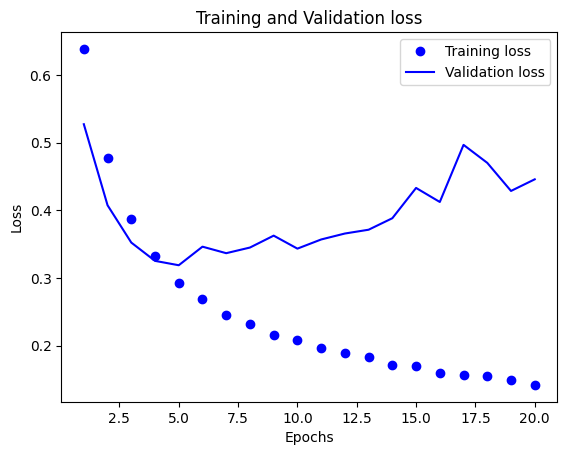

In [17]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label= 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [18]:
train_acc_values=history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

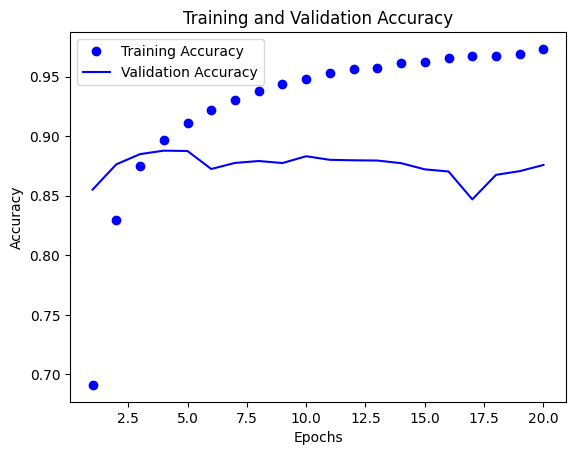

In [19]:
plt.plot(epochs, train_acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label= 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plbt.legend()b

In [20]:
results= model1.evaluate(x_test, y_test)
results

782/782 [==============================] - 3s 3ms/step - loss: 0.4725 - accuracy: 0.8639


[0.4725399315357208, 0.8639199733734131]

### Model 2

In [21]:
model2 = models.Sequential()
model2.add(layers.Dense(16, kernel_regularizer = regularizers.l1(0.001), activation = 'relu', input_shape = (10000,)))
model2.add(layers.Dense(16, activation = 'relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(1, activation = 'sigmoid'))
model2.compile(optimizer ='rmsprop', loss='binary_crossentropy', metrics = ['accuracy'])

In [22]:
history = model2.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 54ms/step - loss: 1.1207 - accuracy: 0.6905 - val_loss: 0.6921 - val_accuracy: 0.8133
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.6581 - accuracy: 0.7920 - val_loss: 0.6072 - val_accuracy: 0.8510
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.6092 - accuracy: 0.8159 - val_loss: 0.5699 - val_accuracy: 0.8542
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5796 - accuracy: 0.8299 - val_loss: 0.5701 - val_accuracy: 0.8374
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5614 - accuracy: 0.8409 - val_loss: 0.5305 - val_accuracy: 0.8618
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5475 - accuracy: 0.8480 - val_loss: 0.5232 - val_accuracy: 0.8593
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5362 - accuracy: 0.8534 - val_loss: 0.5065 - val_accuracy: 0.8678
Epoch 8/20
30

In [ ]:
results= model2.evaluate(x_test, y_test)
results

In [32]:
model3 = models.Sequential()
model3.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.005), activation = 'relu', input_shape = (10000,)))
model3.add(layers.Dense(16, activation = 'relu'))
model3.add(layers.Dropout(0.3))
model3.add(layers.Dense(1, activation = 'sigmoid'))
model3.compile(optimizer ='rmsprop', loss='binary_crossentropy', metrics = ['accuracy'])

In [35]:
model3.fit(partial_x_train, partial_y_train, epochs=6, batch_size=512)

Epoch 1/6
30/30 [==============================] - 1s 16ms/step - loss: 0.2708 - accuracy: 0.9286
Epoch 2/6
30/30 [==============================] - 0s 16ms/step - loss: 0.2716 - accuracy: 0.9295
Epoch 3/6
30/30 [==============================] - 0s 14ms/step - loss: 0.2604 - accuracy: 0.9316
Epoch 4/6
30/30 [==============================] - 1s 20ms/step - loss: 0.2659 - accuracy: 0.9303
Epoch 5/6
30/30 [==============================] - 1s 17ms/step - loss: 0.2585 - accuracy: 0.9329
Epoch 6/6
30/30 [==============================] - 1s 18ms/step - loss: 0.2575 - accuracy: 0.9360


In [36]:
results= model3.evaluate(x_test, y_test)
results

782/782 [==============================] - 2s 3ms/step - loss: 0.3871 - accuracy: 0.8711


[0.38706687092781067, 0.8711199760437012]